# Project Title : Crop Recommendation

### Problem Statement : Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

### Data fields :
* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm
* label

Dataset Link : https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

###Import Library


In [ ]:
import sys
print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)

Python version
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Version info.
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

###Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project_List/Smart Farming/Dataset/SmartCrop-Dataset.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
print(len(df[df.duplicated()]))

0


###EDA

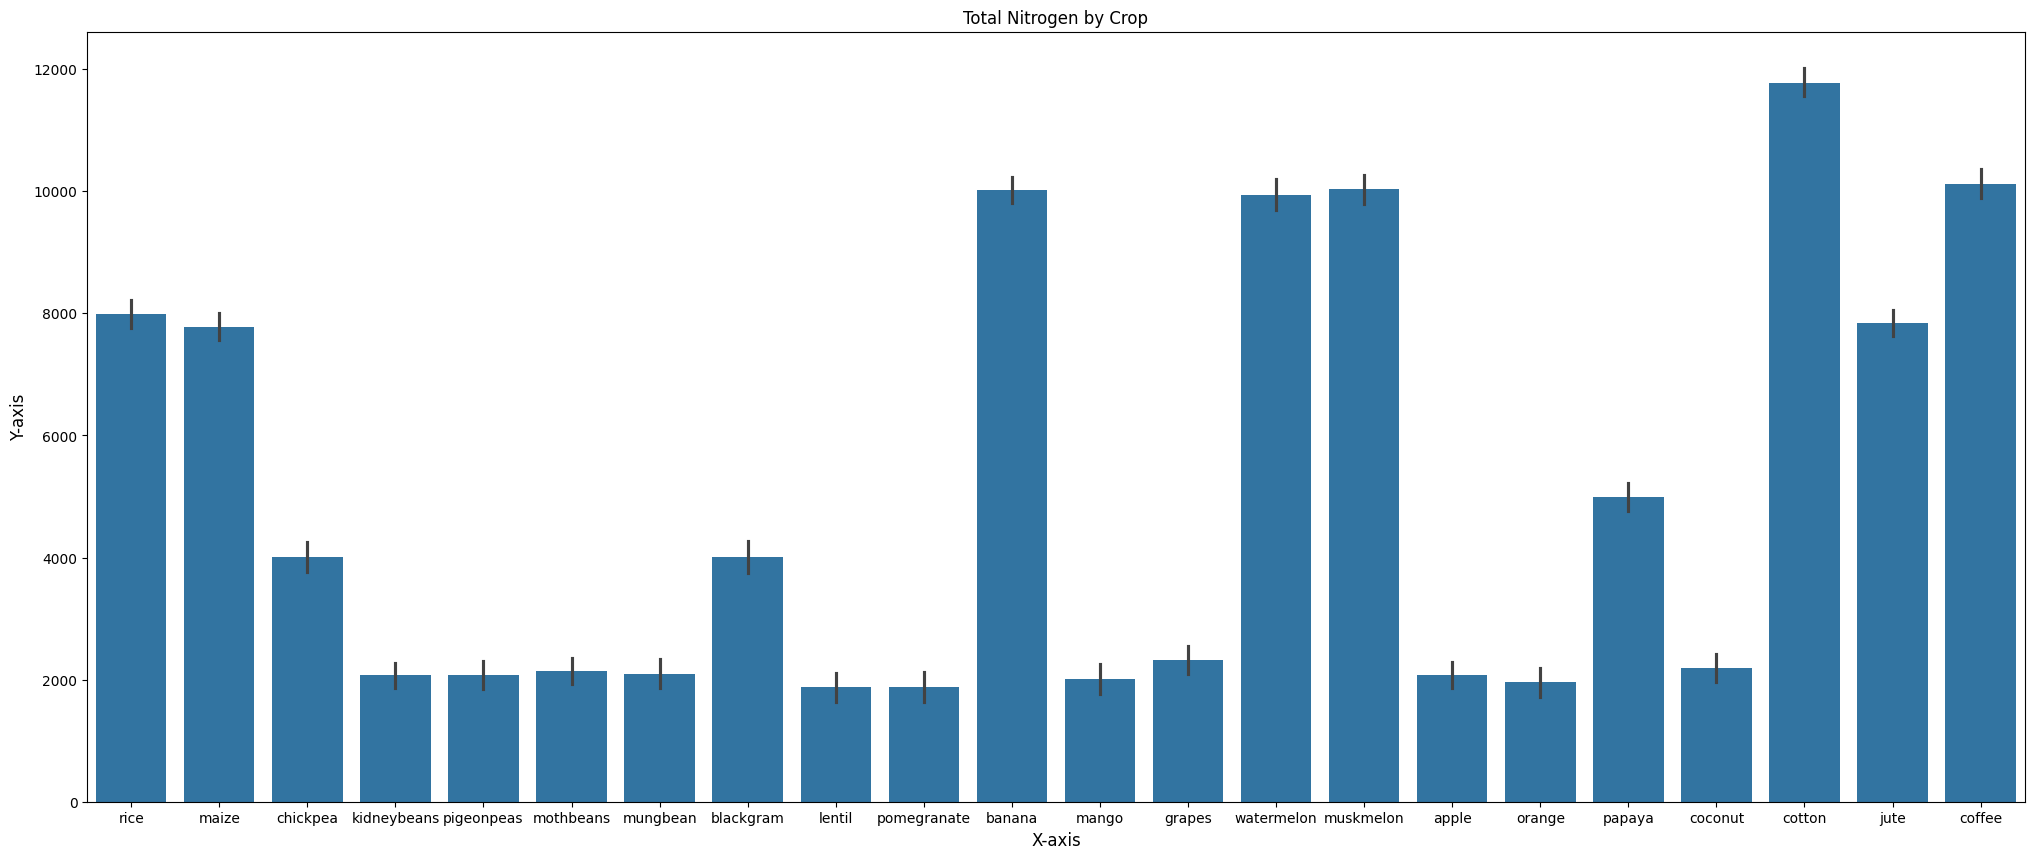

In [ ]:
# Plot 1
plt.figure(figsize=(25, 10))
sns.barplot(x='label', y='N', data=df, estimator=sum)
plt.title('Total Nitrogen by Crop',fontsize=12)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

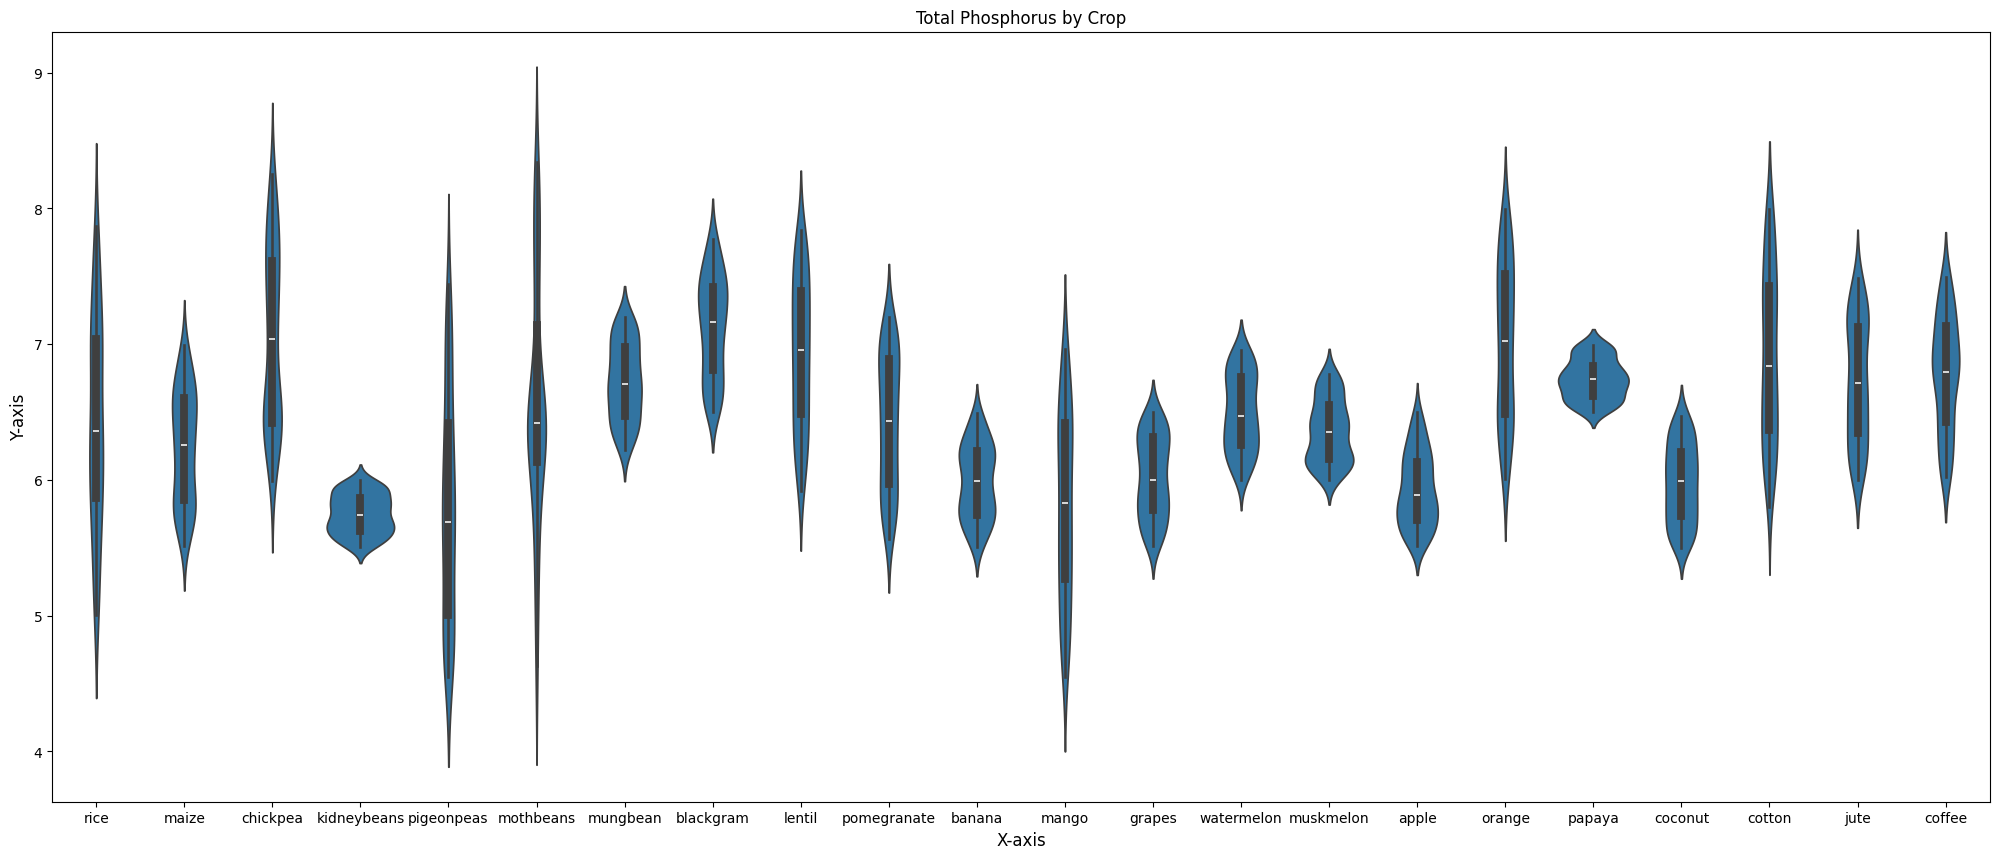

In [ ]:
# Plot 2
plt.figure(figsize=(25, 10))
sns.violinplot(x='label', y='ph', data=df)
plt.title('Total Phosphorus by Crop',fontsize=12)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

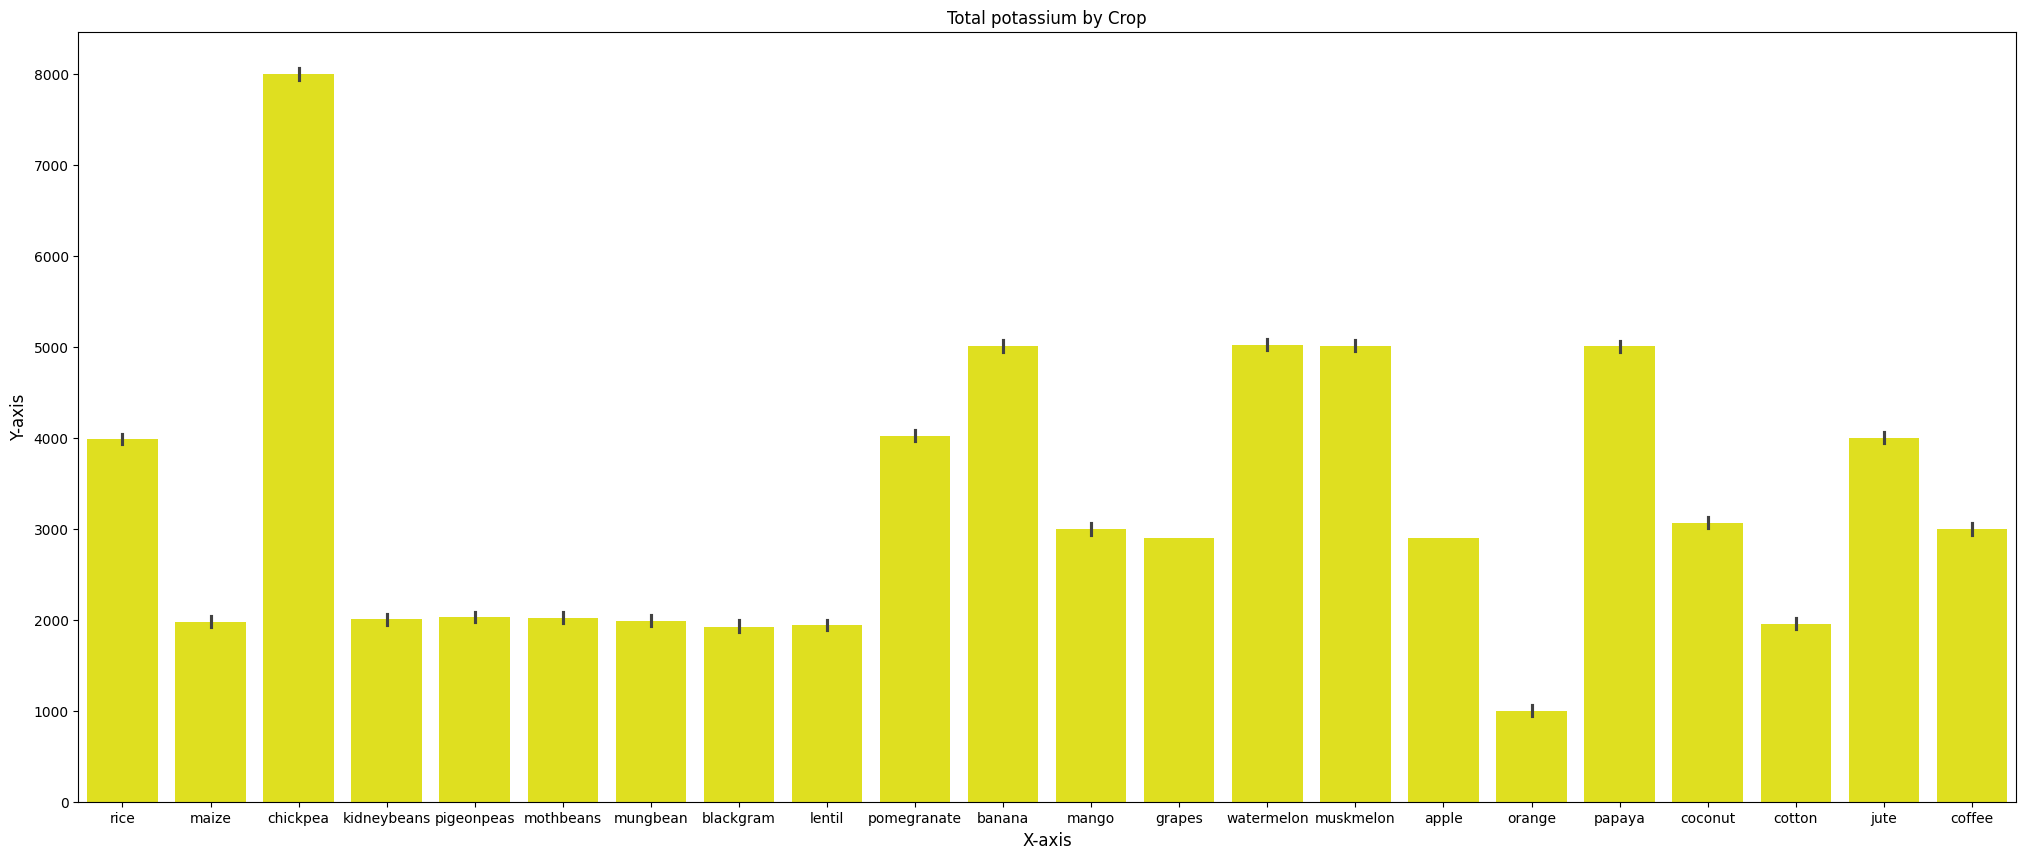

In [ ]:
# Plot 3
plt.figure(figsize=(25, 10))
sns.barplot(x='label', y='K',color='yellow', data=df, estimator=sum)
plt.title('Total potassium by Crop',fontsize=12)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

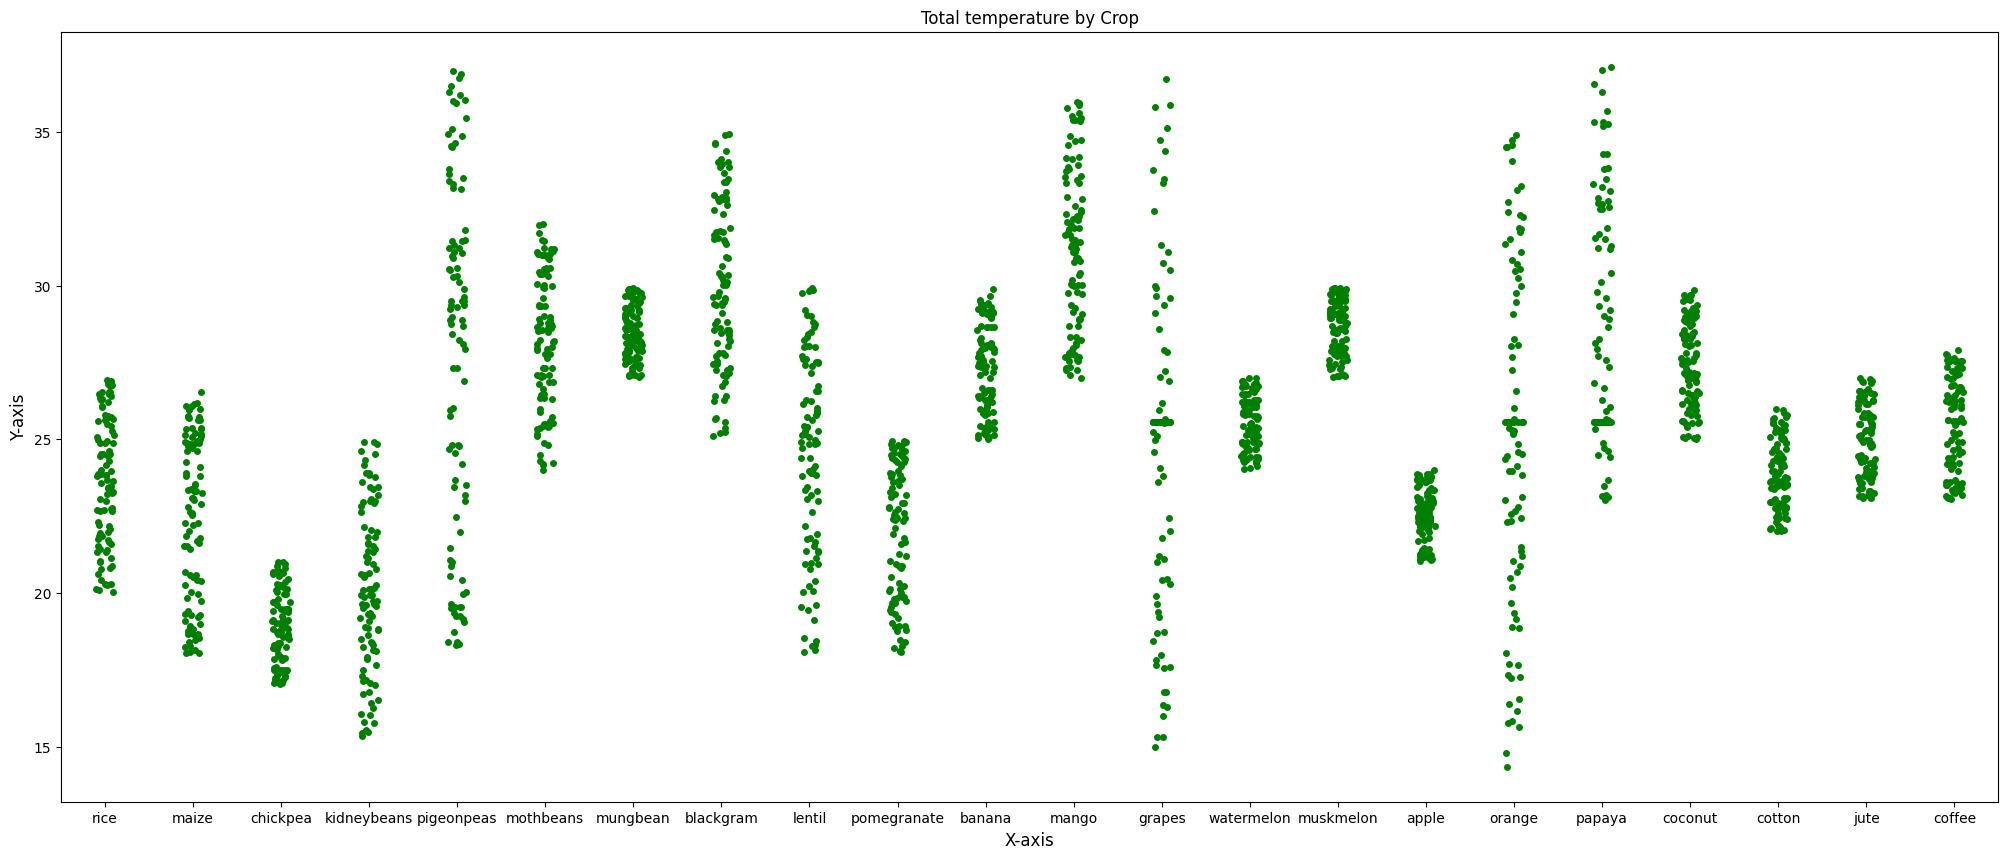

In [ ]:
# Plot 4
plt.figure(figsize=(25, 10))
sns.stripplot(x='label', y='temperature',color='green', data=df)
plt.title('Total temperature by Crop',fontsize=12)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

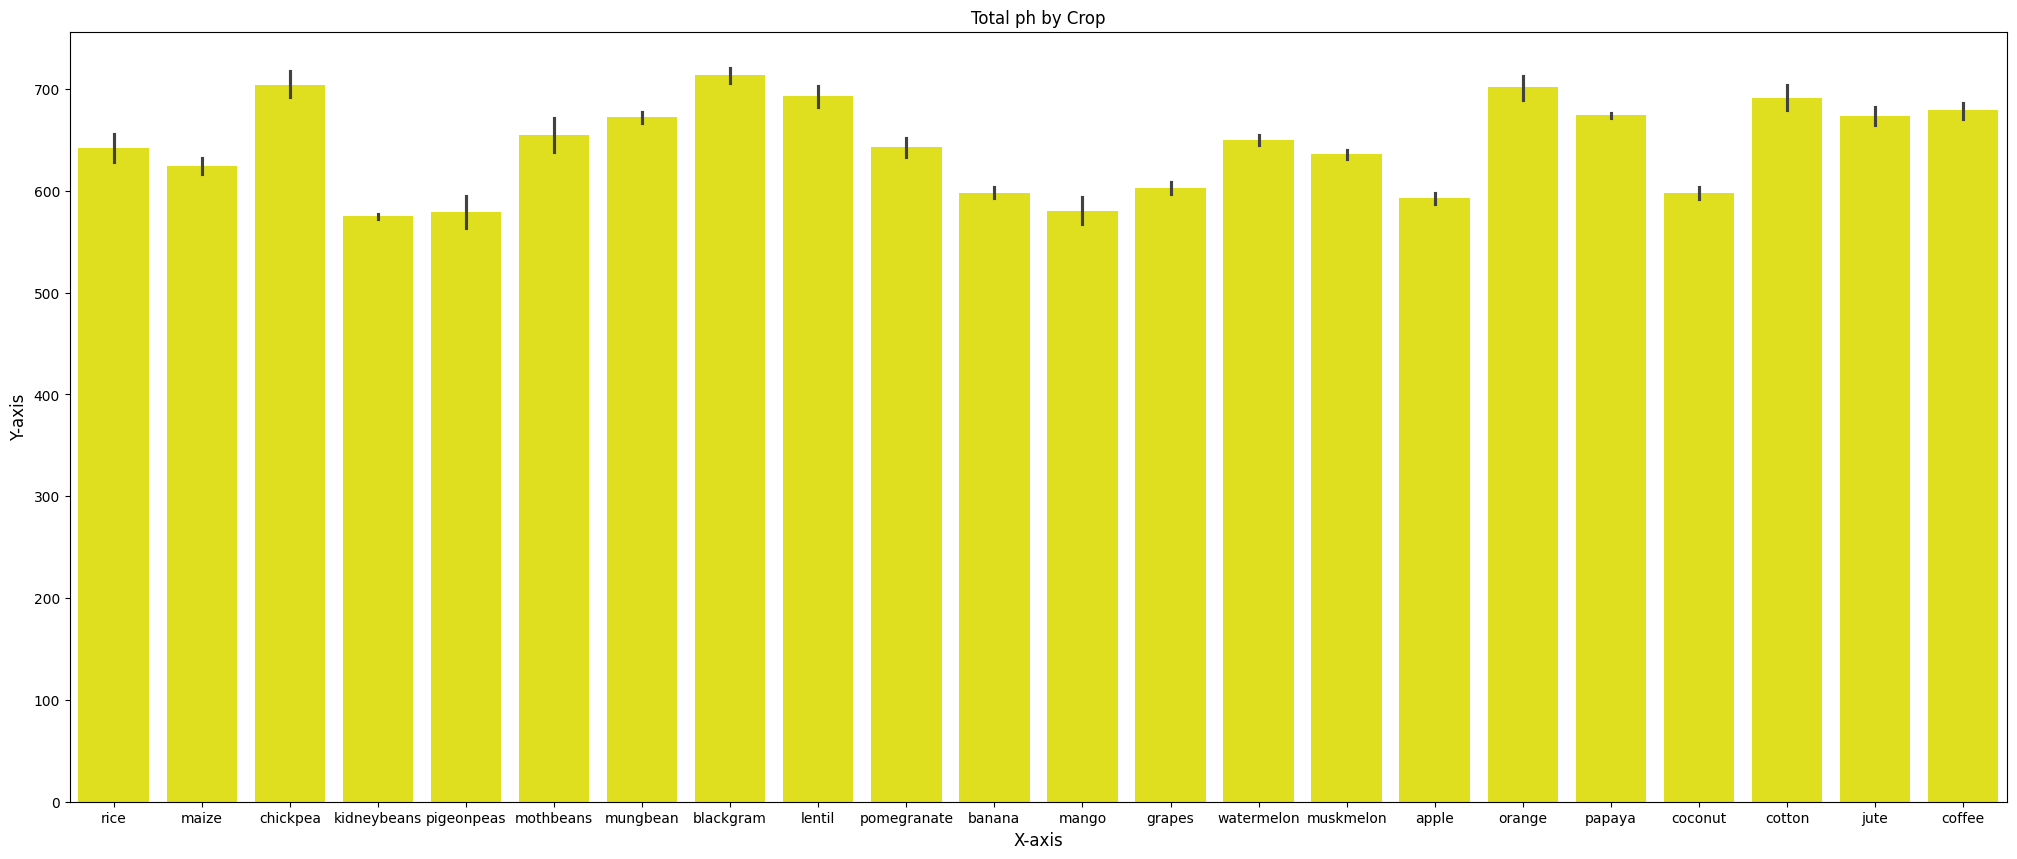

In [ ]:
# Plot 5
plt.figure(figsize=(25, 10))
sns.barplot(x='label', y='ph', data=df,color='yellow', estimator=sum)
plt.title('Total ph by Crop',fontsize=12)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

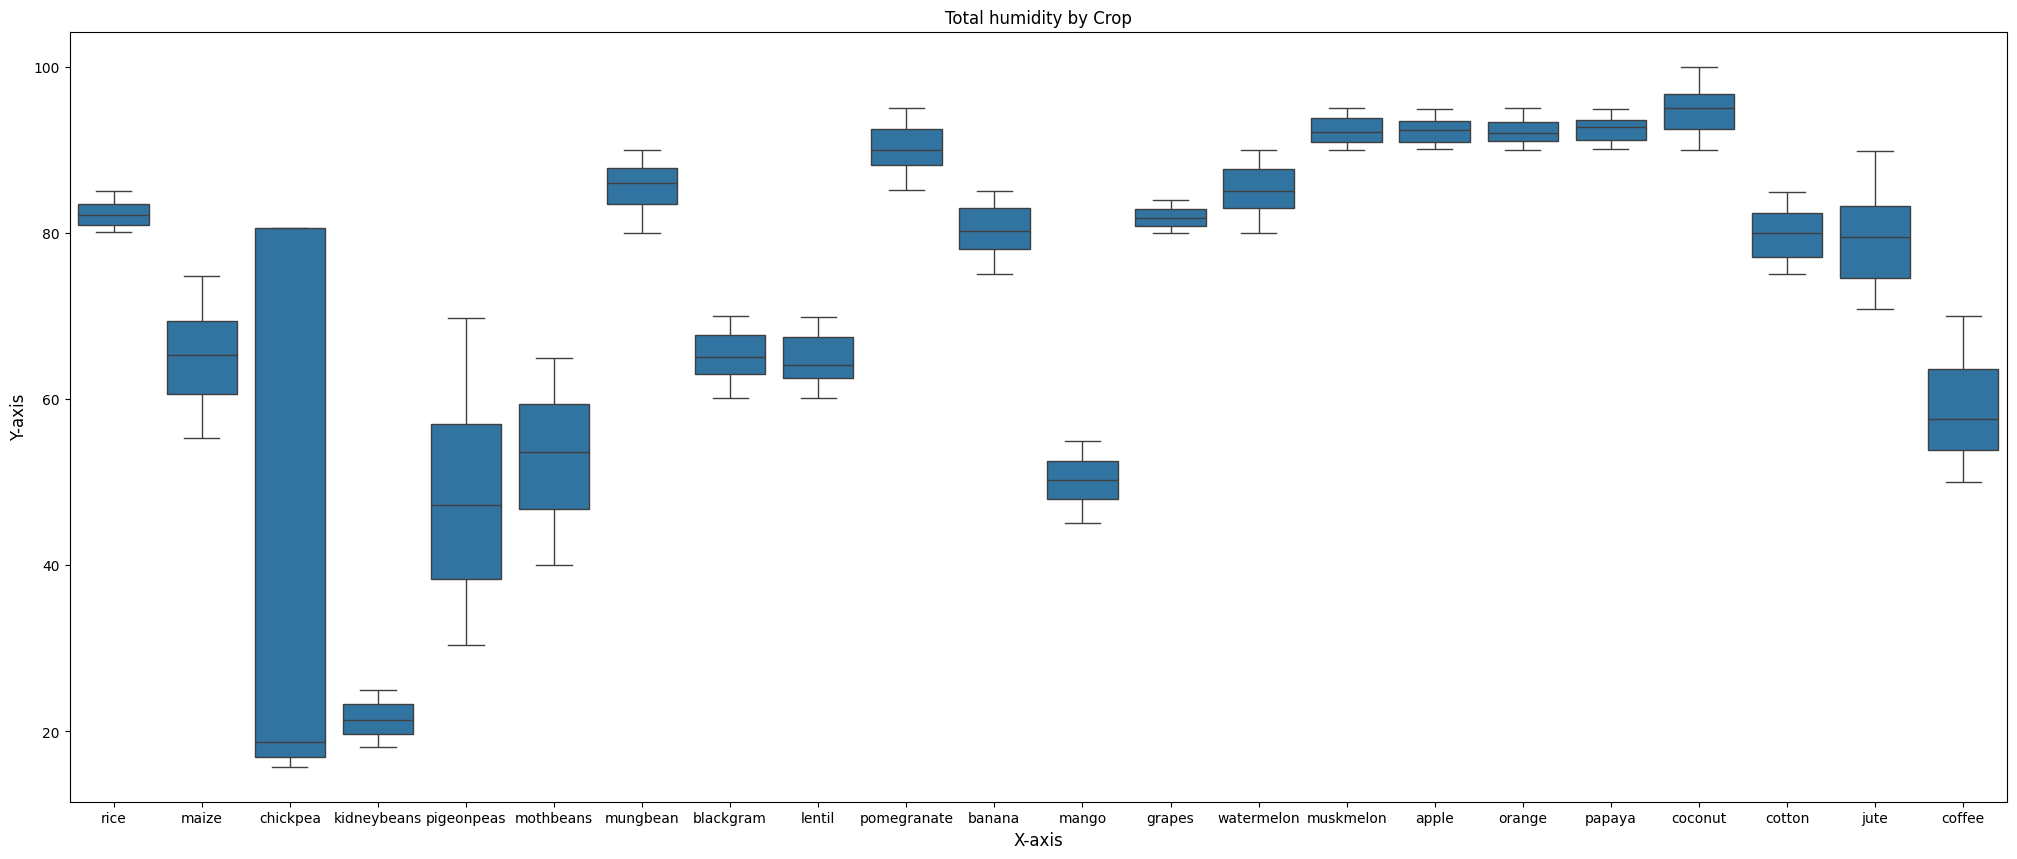

In [ ]:
# Plot 6
plt.figure(figsize=(25, 10))
sns.boxplot(x='label', y='humidity', data=df)
plt.title('Total humidity by Crop',fontsize=12)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

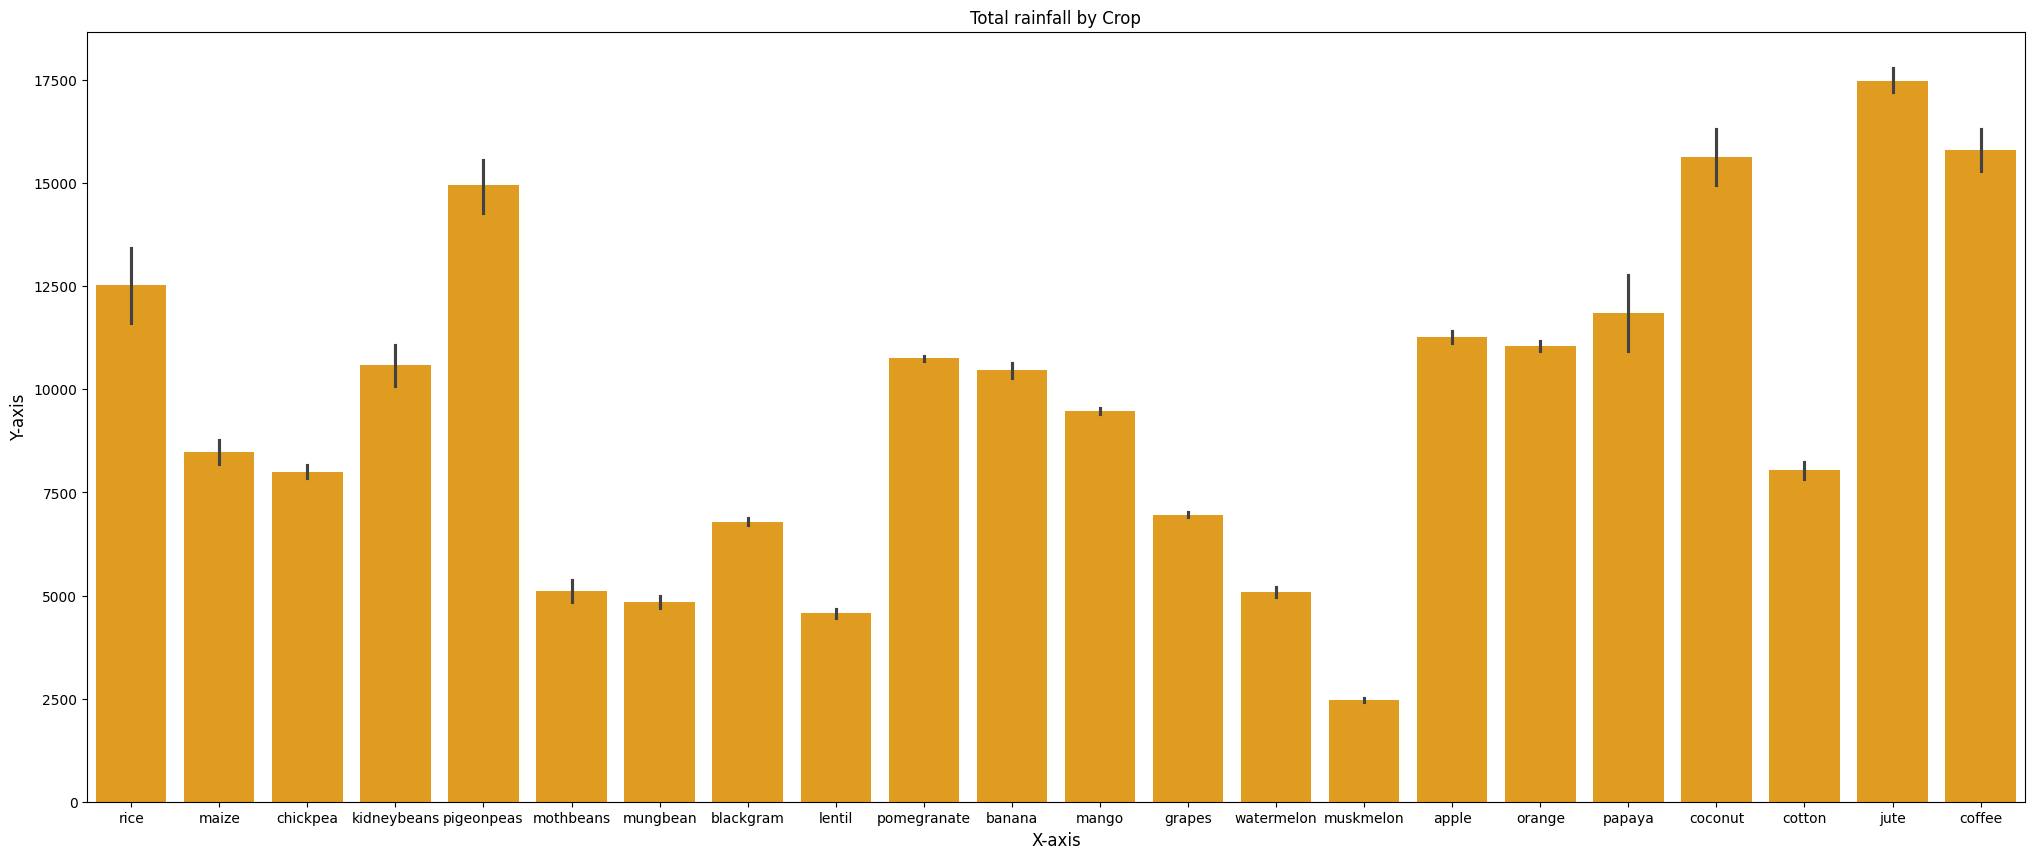

In [ ]:
# Plot 7
plt.figure(figsize=(25, 10))
sns.barplot(x='label', y='rainfall', data=df,color='orange', estimator=sum)
plt.title('Total rainfall by Crop',fontsize=12)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

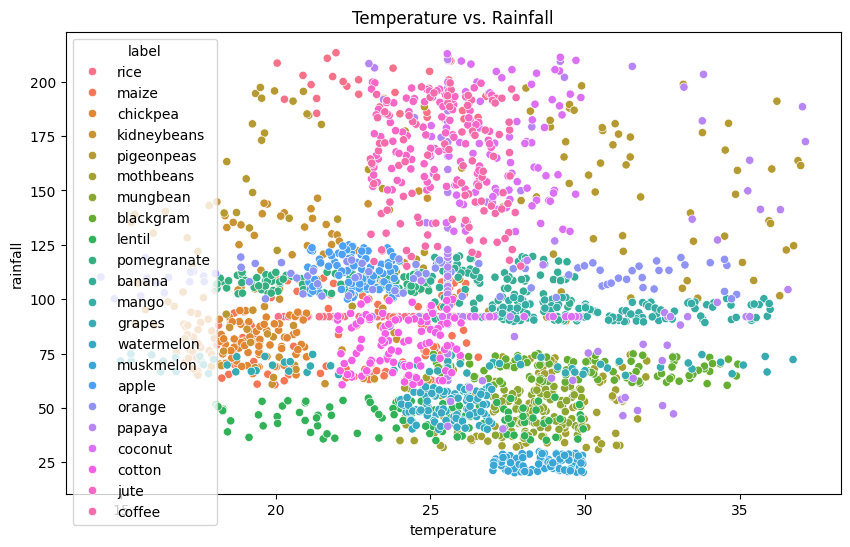

In [ ]:
# Plot 8
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='rainfall', hue='label', data=df)
plt.title('Temperature vs. Rainfall')
plt.show()

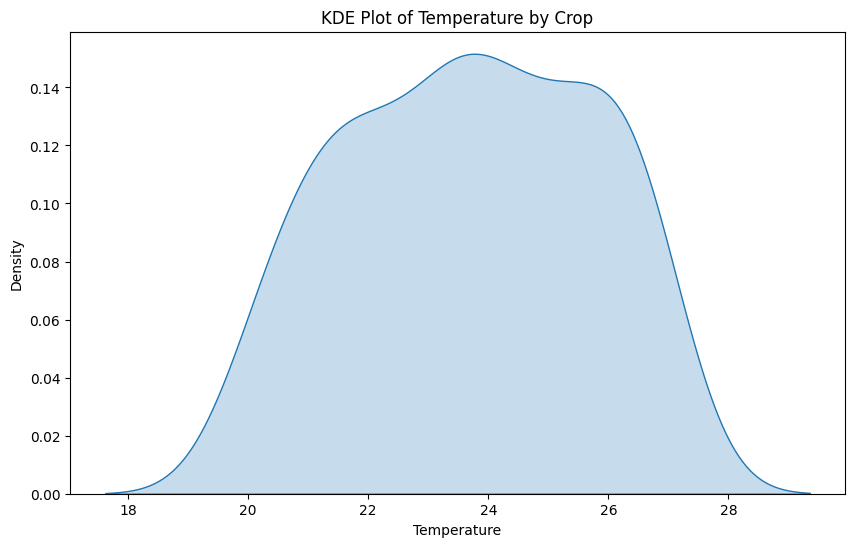

In [ ]:
# Plot 9
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'rice']['temperature'], label='Rice', shade=True)
plt.title('KDE Plot of Temperature by Crop')
plt.xlabel('Temperature')
plt.show()

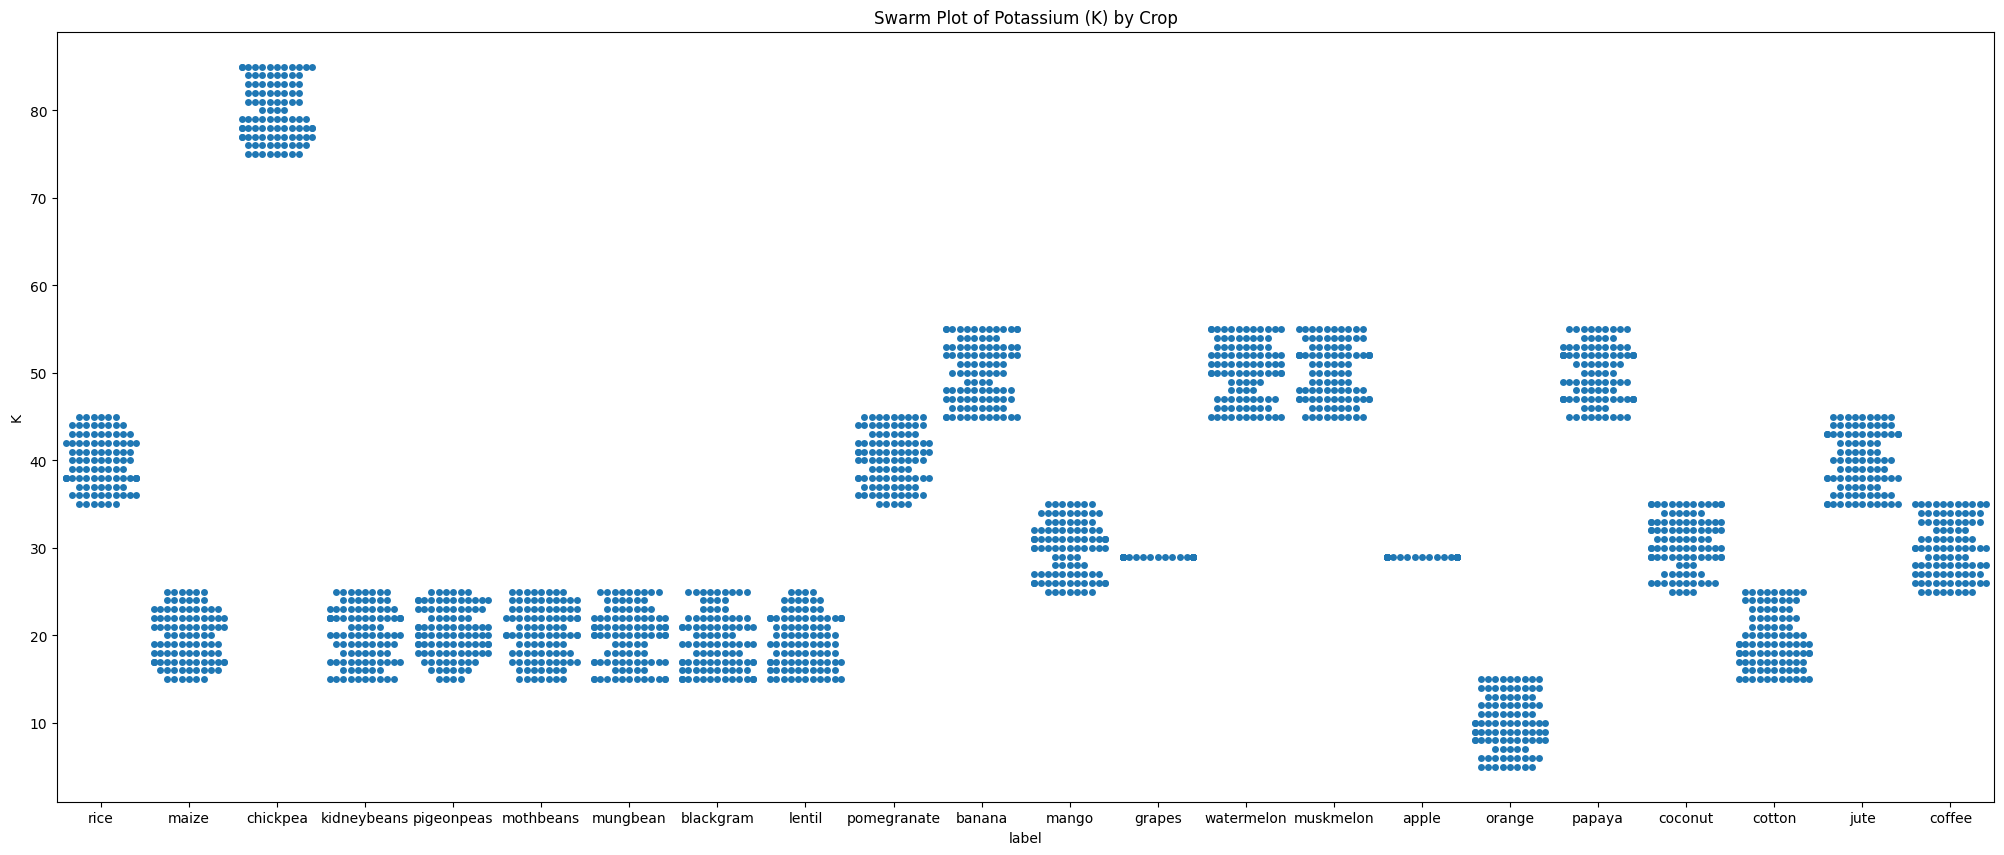

In [ ]:
# Plot 10
plt.figure(figsize=(25, 10))
sns.swarmplot(x='label', y='K', data=df)
plt.title('Swarm Plot of Potassium (K) by Crop')
plt.show()

###Detecing the Outlier

In [ ]:
numeric_column = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
detec_outlier_column = df[numeric_column]

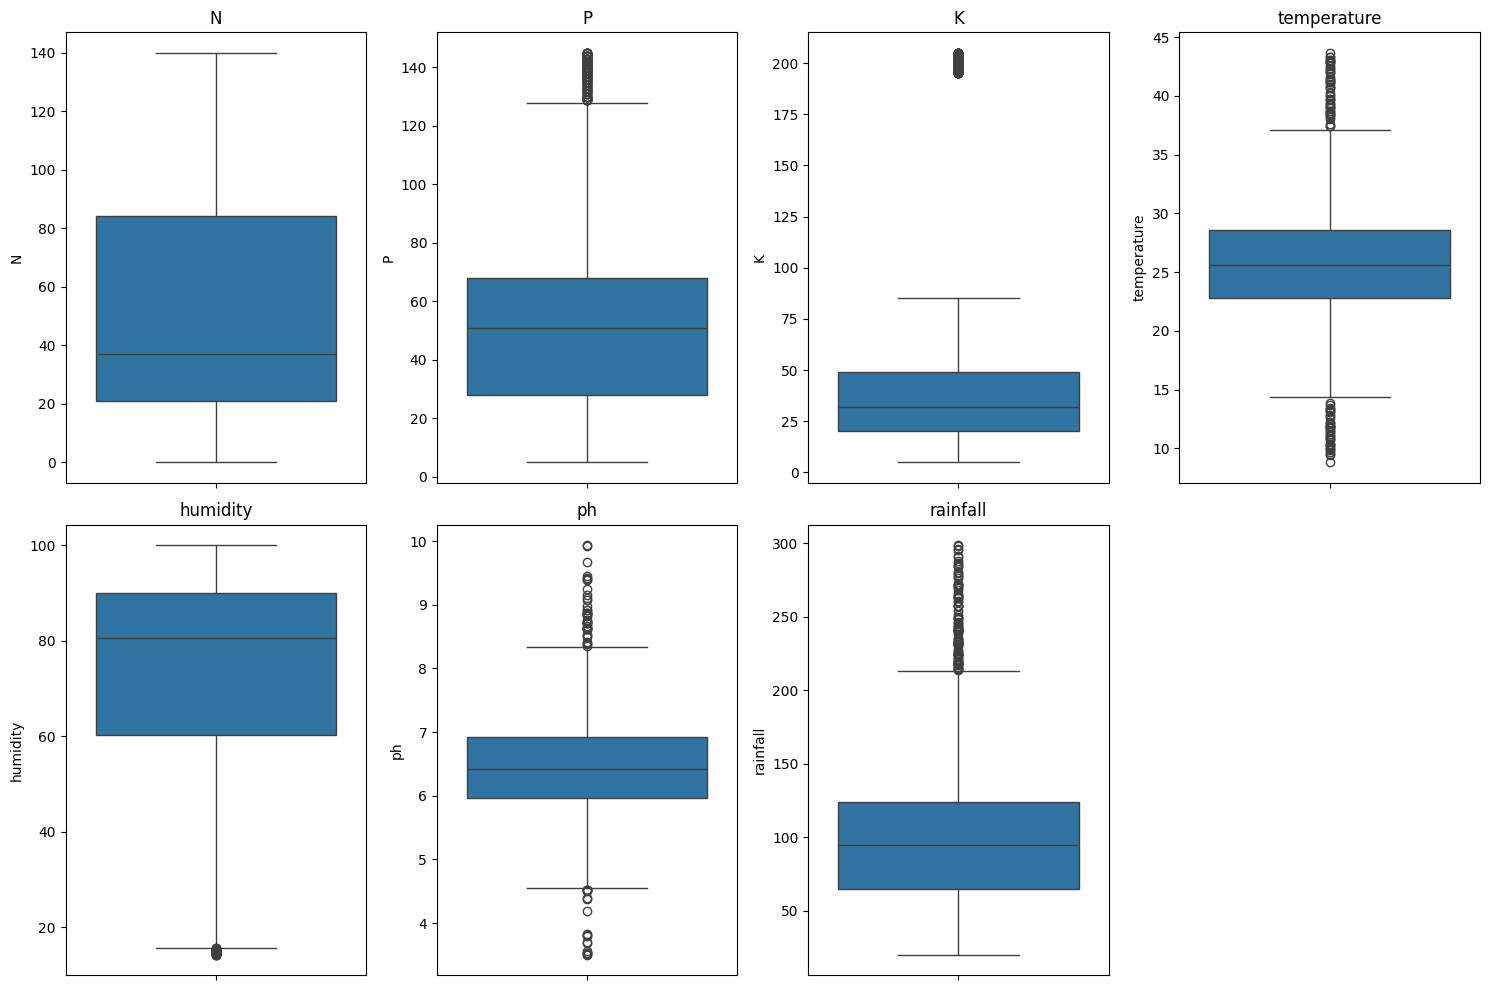

In [ ]:
plt.figure(figsize=(15, 10))

for index, item in enumerate(numeric_column):
    plt.subplot(2, 4, index + 1)
    sns.boxplot(df[item])
    plt.title(item)
    plt.tight_layout()

plt.show()

In [ ]:
outlier_column=['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
print(outlier_column)

['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [ ]:
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1
IQR

P              40.000000
K              29.000000
temperature     5.792279
humidity       29.686818
ph              0.951950
rainfall       59.715822
dtype: float64

In [ ]:
# determining the upper and lower limit for the removal of outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2062 non-null   float64
 2   K            2000 non-null   float64
 3   temperature  2114 non-null   float64
 4   humidity     2170 non-null   float64
 5   ph           2143 non-null   float64
 6   rainfall     2100 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 137.6+ KB


In [ ]:
df['P'] = df['P'].fillna(df['P'].median())
df['K'] = df['K'].fillna(df['K'].median())
df['temperature'] = df['temperature'].fillna(df['temperature'].median())
df['humidity'] = df['humidity'].fillna(df['humidity'].median())
df['ph'] = df['ph'].fillna(df['ph'].median())
df['rainfall'] = df['rainfall'].fillna(df['rainfall'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   float64
 2   K            2200 non-null   float64
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 137.6+ KB


###Assign X and y

In [ ]:
# Separate features and target variable
X = df.drop(['label'], axis=1)
y = df['label']

In [ ]:
print(X.shape)
print(y.shape)

(2200, 7)
(2200,)


In [ ]:
# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

###Split X_train and y_train

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1540, 7)
(660, 7)
(1540,)
(660,)


###Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###LogisticRegression

In [ ]:
#Importing Logistic Regression
logistic_model = LogisticRegression(random_state=30)
logistic_model=logistic_model.fit(X_train,y_train)
#Making prediction
y_pred_lg = logistic_model.predict(X_test)
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:,1]

In [ ]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.89      0.92      0.91        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        28
           7       1.00      0.91      0.95        23
           8       0.70      0.91      0.79        34
           9       0.97      0.97      0.97        36
          10       0.88      0.95      0.91        22
          11       0.96      0.96      0.96        26
          12       1.00      1.00      1.00        32
          13       0.97      0.94      0.96        34
          14       0.97      1.00      0.98        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
          17       0.92    

###RandomForestClassifier

In [ ]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step: Evaluating the Model
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.87      1.00      0.93        34
           9       1.00      1.00      1.00        36
          10       0.95      0.95      0.95        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       0.97      0.97      0.97        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
    

*   Random Forest gives the best result

##Predict the Model

In [ ]:
# Function to predict crop based on input values
def recommend_crop(input_values):
    input_scaled = scaler.transform([input_values])
    prediction = model.predict(input_scaled)
    crop_name = label_encoder.inverse_transform(prediction)
    return crop_name[0]

In [ ]:
# Example usage
input_values = [103, 40.0, 30.0, 27.309018, 55.196224, 6.348316, 141.483164]
predicted_crop = recommend_crop(input_values)
print(f"Recommended Crop: {predicted_crop}")

Recommended Crop: coffee


In [ ]:
import pickle

###Save Model

In [ ]:
# Save model and encoders
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [ ]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
# Load model and encoders
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('label_encoder.pkl', 'rb') as le_file:
    label_encoder = pickle.load(le_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

In [ ]:
# Prediction
input_values = [103, 40.0, 30.0, 27.309018, 55.196224, 6.348316, 141.483164]
input_values_reshaped = np.array(input_values).reshape(1, -1)
input_values_scaled = scaler.transform(input_values_reshaped)

predicted_label = model.predict(input_values_scaled)
predicted_crop_name = label_encoder.inverse_transform(predicted_label)

print(predicted_crop_name)

['coffee']
